# Popular Data Science Questions

Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com) to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange

#### What kind of questions are welcome on this site?

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:
* Avoid subjective questions.,
* Ask practical questions about Data Science — there are adequate sites for theoretical questions
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the _Learn_ section, there are other two sites that are relevant:
* [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
* [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

#### What, other than questions, does DSSE's [home](https://datascience.stackexchange.com) subdivide into?

On the [home page](https://datascience.stackexchange.com/) we can see that we have four sections:

* [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked
* [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions)

 ![tags_ds](https://dq-content.s3.amazonaws.com/469/tags_ds.png)
 
 
 * [Users](https://datascience.stackexchange.com/users) — a list of users
 * [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions
 
The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.
 
 
Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

#### What information is available in each post?

Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) question, some of the information we see is:


* For both questions and answers:
* The posts's score
* The posts's title
* The posts's author
* The posts's body
* For questions only
* How many users have it on their
* The last time the question as active
* How many times the question was viewed
* Related questions
* The question's tags


## Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for our goal:
* Posts
* PostTags
* Tags
* TagSynonyms

The `Tags` table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tags = pd.read_csv("tags.csv")
tags.sort_values(by = "Count", ascending = False).head(10)

,Id,TagName,Count,ExcerptPostId,WikiPostId
1,2,machine-learning,8347,4909.0,4908.0
31,46,python,4854,5523.0,5522.0
55,81,neural-network,3477,8885.0,8884.0
107,194,deep-learning,3446,8956.0,8955.0
52,77,classification,2350,4911.0,4910.0
188,324,keras,2160,9251.0,9250.0
81,128,scikit-learn,1658,5896.0,5895.0
185,321,tensorflow,1584,9183.0,9182.0
32,47,nlp,1516,147.0,146.0
18,24,r,1241,49.0,48.0


Running a few exploratory queries, leads us to focus our efforts on `Posts` table instead.

Extracted all the columns from posts into a 2019_questions.csv using this query

`SELECT 
    Id, 
    PostTypeId, 
    CreationDate, 
    Score, 
    ViewCount, 
    Tags, 
    AnswerCount, 
    FavoriteCount
FROM Posts;`

Let's check the data. 

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates = ["CreationDate"])
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Only the FavoriteCount column is missing values. We can replace NaN with 0 and convert it to an integer. The type of each column is adequate because I imported CreationDate as a datetime object but the tags column could be cleaned up to remove the brackets <> and broken down in multiple columns.  

## Clean the data

Let's clean the Favorite count first. 

In [4]:
questions.fillna(0, inplace = True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,0
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,0
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,0
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,0


Now let's clean the tags so that we keep them as a list instead of breaking it down in 5 colums because it's not super useful. 

In [5]:
questions["Tags"] = questions["Tags"].str.replace(("^<|>$"),"").str.split("><")
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
5,44430,2019-01-23 11:13:32,0,283,[fuzzy-logic],1,0
6,44432,2019-01-23 11:17:46,1,214,"[time-series, anomaly-detection, online-learning]",0,1
7,44436,2019-01-23 12:49:39,0,9,[matrix-factorisation],0,0
8,44437,2019-01-23 13:04:11,0,7,"[correlation, naive-bayes-classifier]",0,0
9,44438,2019-01-23 13:16:29,0,584,"[machine-learning, python, deep-learning, kera...",1,0


In [6]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


## Analyze the data

Let's answer these following questions
* How many times each tag was used?
* How many times each tag was viewed?

Then let's create visualizations for the top tags of each of the above results.

### How many times each tag was used?

In [7]:
# normally I would just use tags_col = questions["Tags"].explode() damn in this version of panda is too old. I need to create a loop as a result. 
print("Panda version is " + pd.__version__ + ", hence too old")

Panda version is 0.22.0, hence too old


In [8]:
from collections import defaultdict

tag_count = defaultdict(int)

for tags in questions["Tags"]:
    for tag in tags:
        tag_count[tag] +=1
        
tag_count_df = pd.DataFrame.from_dict(tag_count,orient='index')
tag_count_df = tag_count_df.rename(columns={0: "Count"})
tag_count_df
tag_count_df.sort_values(by = "Count", ascending = False).head(10)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


### How many times each tag was viewed?

In [9]:
tag_views = questions.Tags.apply(pd.Series).add_prefix('tag_')
tag_views["views"] = questions["ViewCount"]
tag_views.head(10)

,tag_0,tag_1,tag_2,tag_3,tag_4,views
0,machine-learning,data-mining,NaN,NaN,NaN,21
1,machine-learning,regression,linear-regression,regularization,NaN,25
2,python,time-series,forecast,forecasting,NaN,1651
3,machine-learning,scikit-learn,pca,NaN,NaN,55
4,dataset,bigdata,data,speech-to-text,NaN,19
5,fuzzy-logic,NaN,NaN,NaN,NaN,283
6,time-series,anomaly-detection,online-learning,NaN,NaN,214
7,matrix-factorisation,NaN,NaN,NaN,NaN,9
8,correlation,naive-bayes-classifier,NaN,NaN,NaN,7
9,machine-learning,python,deep-learning,keras,cnn,584


In [10]:
tag_views = pd.melt(tag_views, id_vars = ["views"] , value_vars = ["tag_0","tag_1","tag_2","tag_3","tag_4"], var_name = "tag_number", value_name = "tag")
tag_views = tag_views[["tag", "views"]]
tag_views = tag_views.dropna().groupby(["tag"]).sum().sort_values(by="views", ascending = False)
tag_views.head(10)

,views
tag,
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457


## Visualize the data

### Distribution of top 20 tags by count

In [11]:
most_used = tag_count_df.nlargest(20,"Count").sort_values(by = "Count", ascending = True)
ax = most_used.plot(kind = 'barh', figsize = (16,8), title = 'tag distribution by count', color='#86bf91', zorder=2, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axis_bgcolor("white")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.8, color='#eeeeee',zorder=1)

### Distribution of top 20 tags by views

In [12]:
most_viewed = tag_views.nlargest(20,"views").sort_values(by = "views", ascending = True)
ax = most_viewed.plot(kind = 'barh', figsize = (16,8), title = 'tag distribution by views', color='#86bf91', zorder=2, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_axis_bgcolor("white")
ax.set_ylabel("")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.8, color='#eeeeee',zorder=1)

Comparing them side by side

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_viewed.plot(kind="barh", ax=axes[0], subplots=True, color='#86bf91',legend = False)
most_used.plot(kind="barh", ax=axes[1], subplots=True, color='#86bf91',legend = False)

for i in (0,1):
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_axis_bgcolor("white")
    axes[i].set_ylabel("")
    vals = axes[i].get_xticks()
    for tick in vals:
        axes[i].axvline(x=tick, linestyle='dashed', alpha=0.8, color='#eeeeee',zorder=1)


## Relations Between Tags

One way of trying to gauge how pairs of tas are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [14]:
all_tags_dup = [tag for tags in questions["Tags"] for tag in tags]
all_tags = list( dict.fromkeys(all_tags_dup))
all_tags = sorted(all_tags)
first_10_tags = all_tags[:10]
first_10_tags

['.net',
 '3d-object-detection',
 '3d-reconstruction',
 'ab-test',
 'accuracy',
 'activation',
 'activation-function',
 'active-learning',
 'activity-recognition',
 'actor-critic']

Then we'll create a data frame to count how many times each tag is related to each other. The frame will look like this:

In [15]:
pd.DataFrame(index = first_10_tags, columns = first_10_tags).fillna("0")

,.net,3d-object-detection,3d-reconstruction,ab-test,accuracy,activation,activation-function,active-learning,activity-recognition,actor-critic
.net,0,0,0,0,0,0,0,0,0,0
3d-object-detection,0,0,0,0,0,0,0,0,0,0
3d-reconstruction,0,0,0,0,0,0,0,0,0,0
ab-test,0,0,0,0,0,0,0,0,0,0
accuracy,0,0,0,0,0,0,0,0,0,0
activation,0,0,0,0,0,0,0,0,0,0
activation-function,0,0,0,0,0,0,0,0,0,0
active-learning,0,0,0,0,0,0,0,0,0,0
activity-recognition,0,0,0,0,0,0,0,0,0,0
actor-critic,0,0,0,0,0,0,0,0,0,0


In [16]:
# creating the full dataframe
tags_df = pd.DataFrame(index = all_tags, columns = all_tags).fillna(0)
tags_df.head(5)

,.net,3d-object-detection,3d-reconstruction,ab-test,accuracy,activation,activation-function,active-learning,activity-recognition,actor-critic,...,weighted-data,weka,wikipedia,wolfram-language,word,word-embeddings,word2vec,xboost,xgboost,yolo
.net,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3d-object-detection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3d-reconstruction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab-test,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accuracy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's insert the values of pairs

In [17]:
for tags in questions["Tags"]:
    tags_df.loc[tags,tags] += 1

#tags_df.head(5)

This data frame is too big, let's just use the most used tags

In [18]:
most_used_tags = list(most_used.index)
most_used_tags = sorted(most_used_tags)
most_used_df = tags_df.loc[most_used_tags,most_used_tags]
#most_used_df.head(5)

Now let's turn this dataframe into a heatmap

In [19]:
# get rid of central values

value = 0
for row in most_used_df:
    value += 1
    most_used_df.iloc[(value-1),(value-1)] = np.NaN

#most_used_df.head(3)

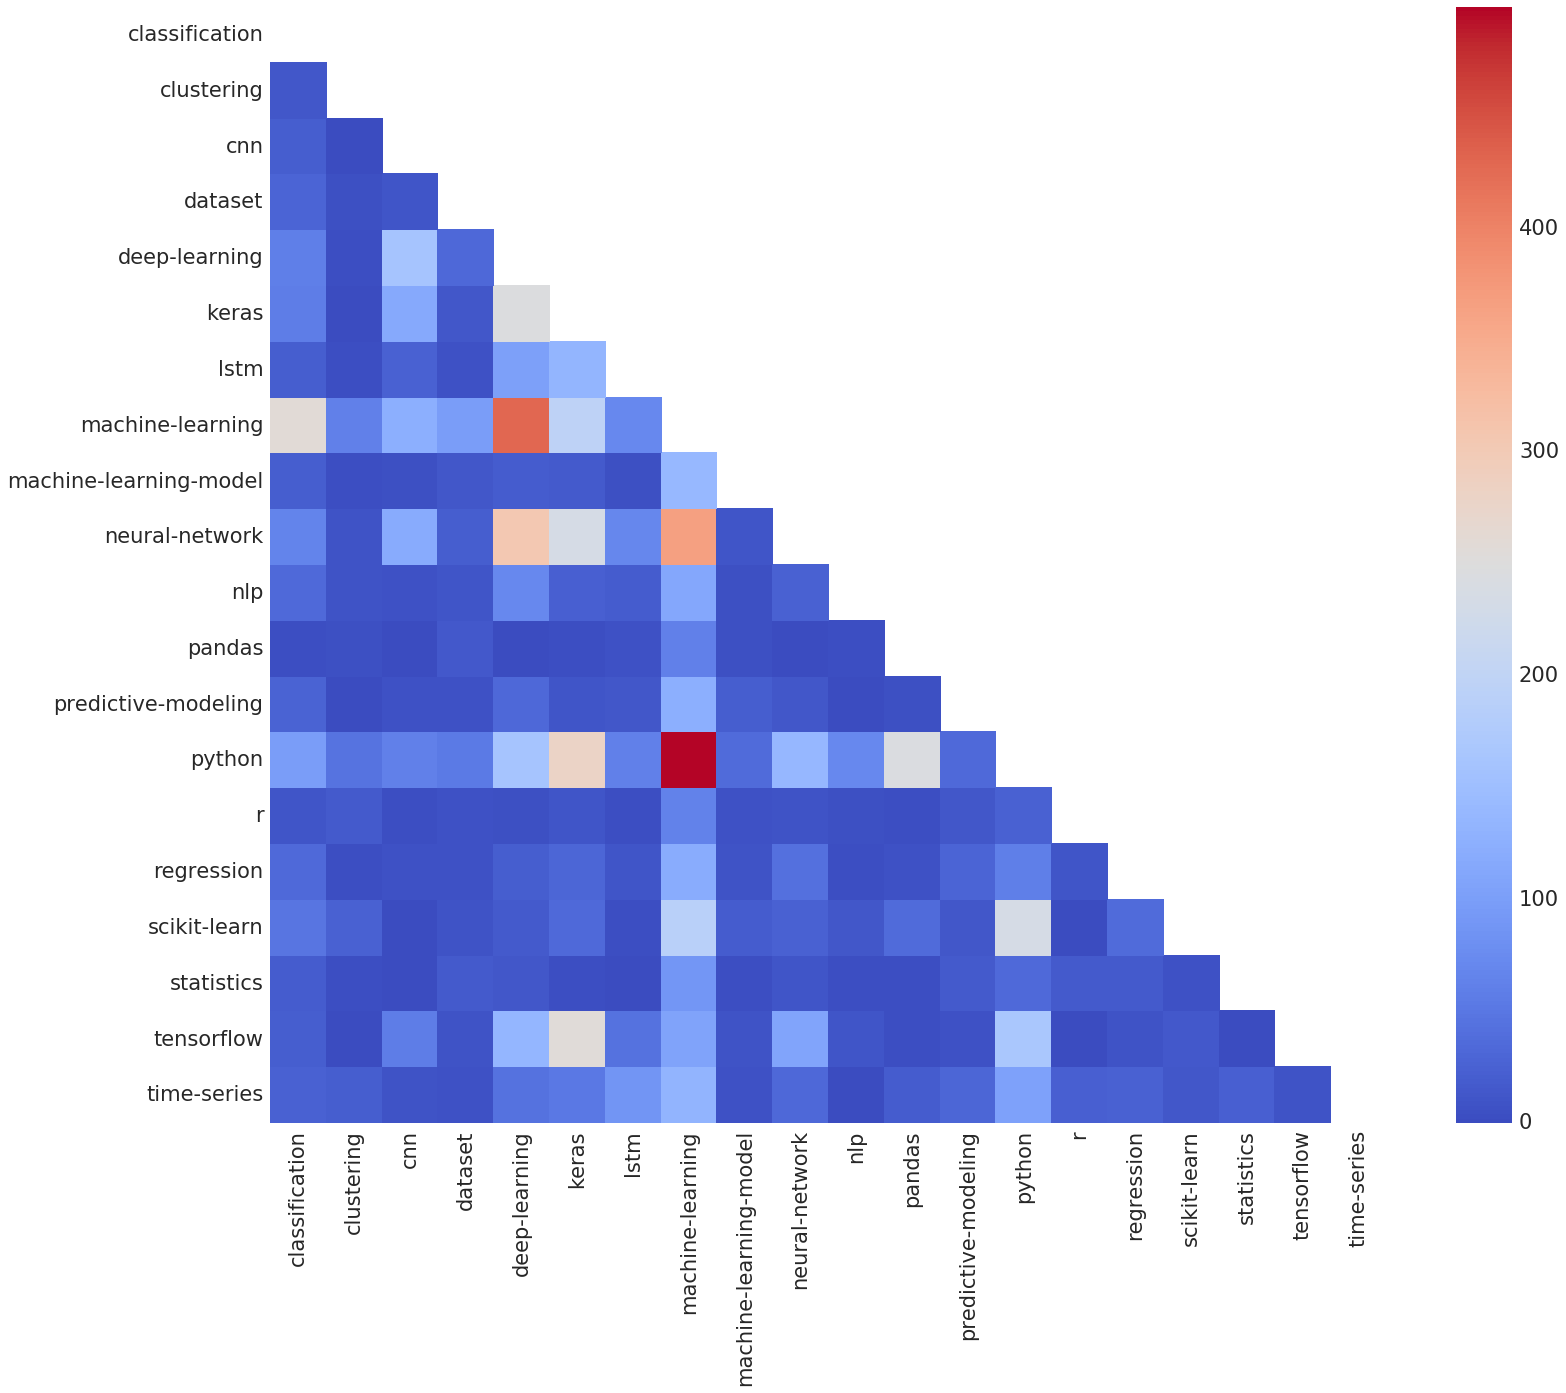

In [20]:
# cols = list(most_used_df.columns) 
# most_used_df = most_used_df.sort_values(by = cols[-1])
%matplotlib inline
sns.set(font_scale=2.1)
f, ax = plt.subplots(figsize=(25,20))
mask = np.zeros(most_used_df.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(most_used_df,cmap="coolwarm",annot=False, mask = mask)
ax.set_axis_bgcolor("white")
plt.xticks(rotation = 90)
plt.show()

We can see that the following pairs have the higest count:
* Pyton & Machine Learning
* Keras & Machine Learning
* Neural Networks & Machine Learning

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Is Deep Learning a Fad?

In [21]:
#import csv as data frame
allquestions = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])

In [22]:
#inspect data dypes
allquestions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [23]:
#clean data
allquestions.fillna(0, inplace = True)
allquestions["Tags"] = allquestions["Tags"].str.replace(("^<|>$"),"").str.split("><")
allquestions.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [24]:
deeplearning =  ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]

def deep(tags):
    for tag in tags:
        if tag in deeplearning:
            return 1
        else: 
            return 0

allquestions["DeepLearning"] = allquestions["Tags"].apply(deep)
                
allquestions.head(5) 

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


In [25]:
# Count how many deep learning questions are asked per time period.

mindate = min(allquestions["CreationDate"])
maxdate = max(allquestions["CreationDate"])

print('the dataset starts at {} and ends at {}'.format(mindate, maxdate))

the dataset starts at 2014-05-13 23:58:30 and ends at 2020-01-19 03:01:03


It's a long time span, we should group it by quarter and get rid of the first half of 2014 and also 2020. 

In [26]:
# remove incomplete quarters

start_date = '2014-07-01'
end_date  = '2019-12-31'
mask = (allquestions['CreationDate'] > start_date) & (allquestions['CreationDate']  <= end_date)
allquestions = allquestions.loc[mask]
newmindate = min(allquestions["CreationDate"])
newmaxdate = max(allquestions["CreationDate"])
print('the dataset starts at {} and ends at {}'.format(newmindate, newmaxdate))

the dataset starts at 2014-07-01 13:44:23 and ends at 2019-12-30 22:37:09


In [34]:
# Count how many deep learning questions are asked per quarter, how many total questions and the share of deep learning questions

allquestions["Quarter"] = allquestions["CreationDate"].dt.to_period("Q")
qtr_count = allquestions.loc[:,["DeepLearning", "Quarter"]].groupby(by="Quarter").agg({"DeepLearning": ['sum', 'size']})
qtr_count.columns = ["Count","Total" ]
qtr_count["share"] = qtr_count["Count"] / qtr_count["Total"]
qtr_count.reset_index(inplace = True)
qtr_count["Quarter"] = qtr_count["Quarter"].astype(str)
qtr_count

,Quarter,Count,Total,share
0,2014Q3,4,189,0.021164
1,2014Q4,4,216,0.018519
2,2015Q1,5,190,0.026316
3,2015Q2,6,284,0.021127
4,2015Q3,13,311,0.041801
5,2015Q4,19,382,0.049738
6,2016Q1,38,516,0.073643
7,2016Q2,45,518,0.086873
8,2016Q3,69,585,0.117949
9,2016Q4,76,527,0.144213


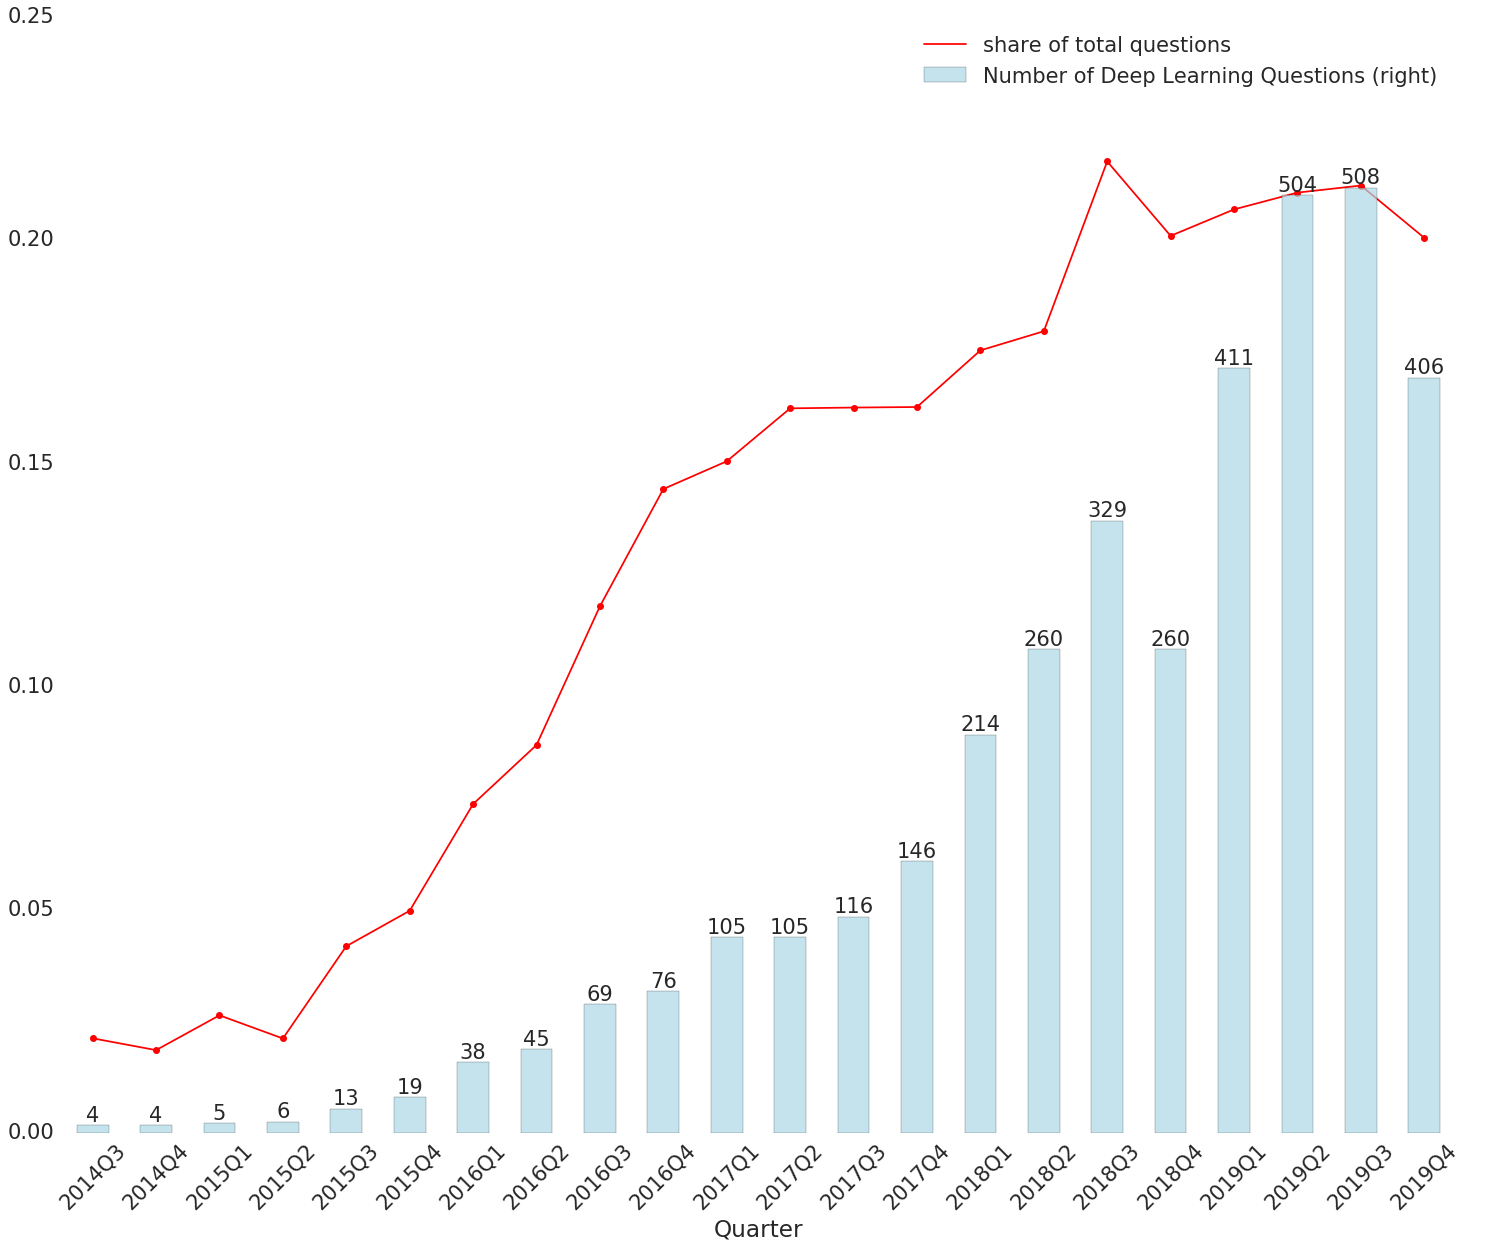

In [74]:
ax1 = qtr_count.plot(x= 'Quarter', y = "share", linestyle='-', color = 'red', marker='o',label = "share of total questions", figsize=(25,20))
ax2 = qtr_count.plot(x = 'Quarter', y = "Count", kind = 'bar', color = 'lightblue',secondary_y=True, alpha=0.7, rot=45,label = "Number of Deep Learning Questions", ax = ax1)
ax1.set_axis_bgcolor("white")
for idx, t in qtr_count["Count"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom", fontsize = "small")
ax2.axis("off");


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.